### 다항회귀

In [1]:
options(repr.plot.width = 15, repr.plot.height = 8)

In [2]:
x <- seq(0, 15)
epsilon <- rnorm(16, 0, 4)
y <- -0.7*x^2+11*x-5+epsilon

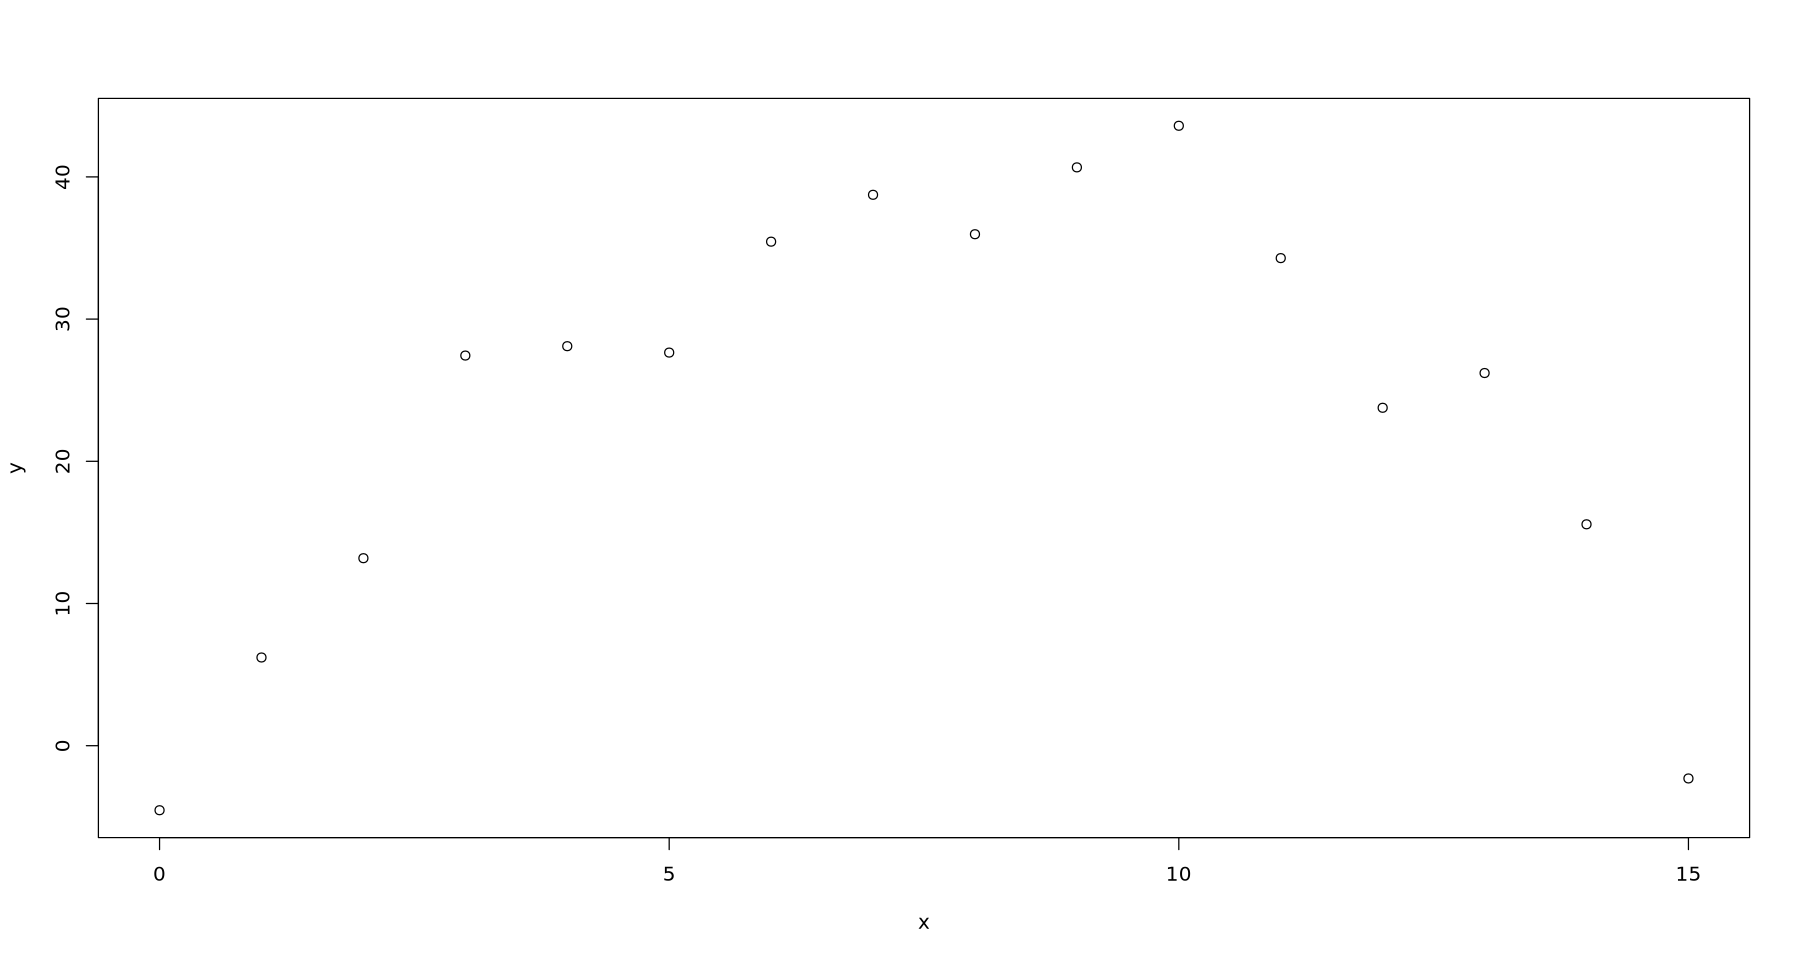

In [3]:
plot(x, y)

`-` 0을 중심으로 하게끔 shift한 플롯

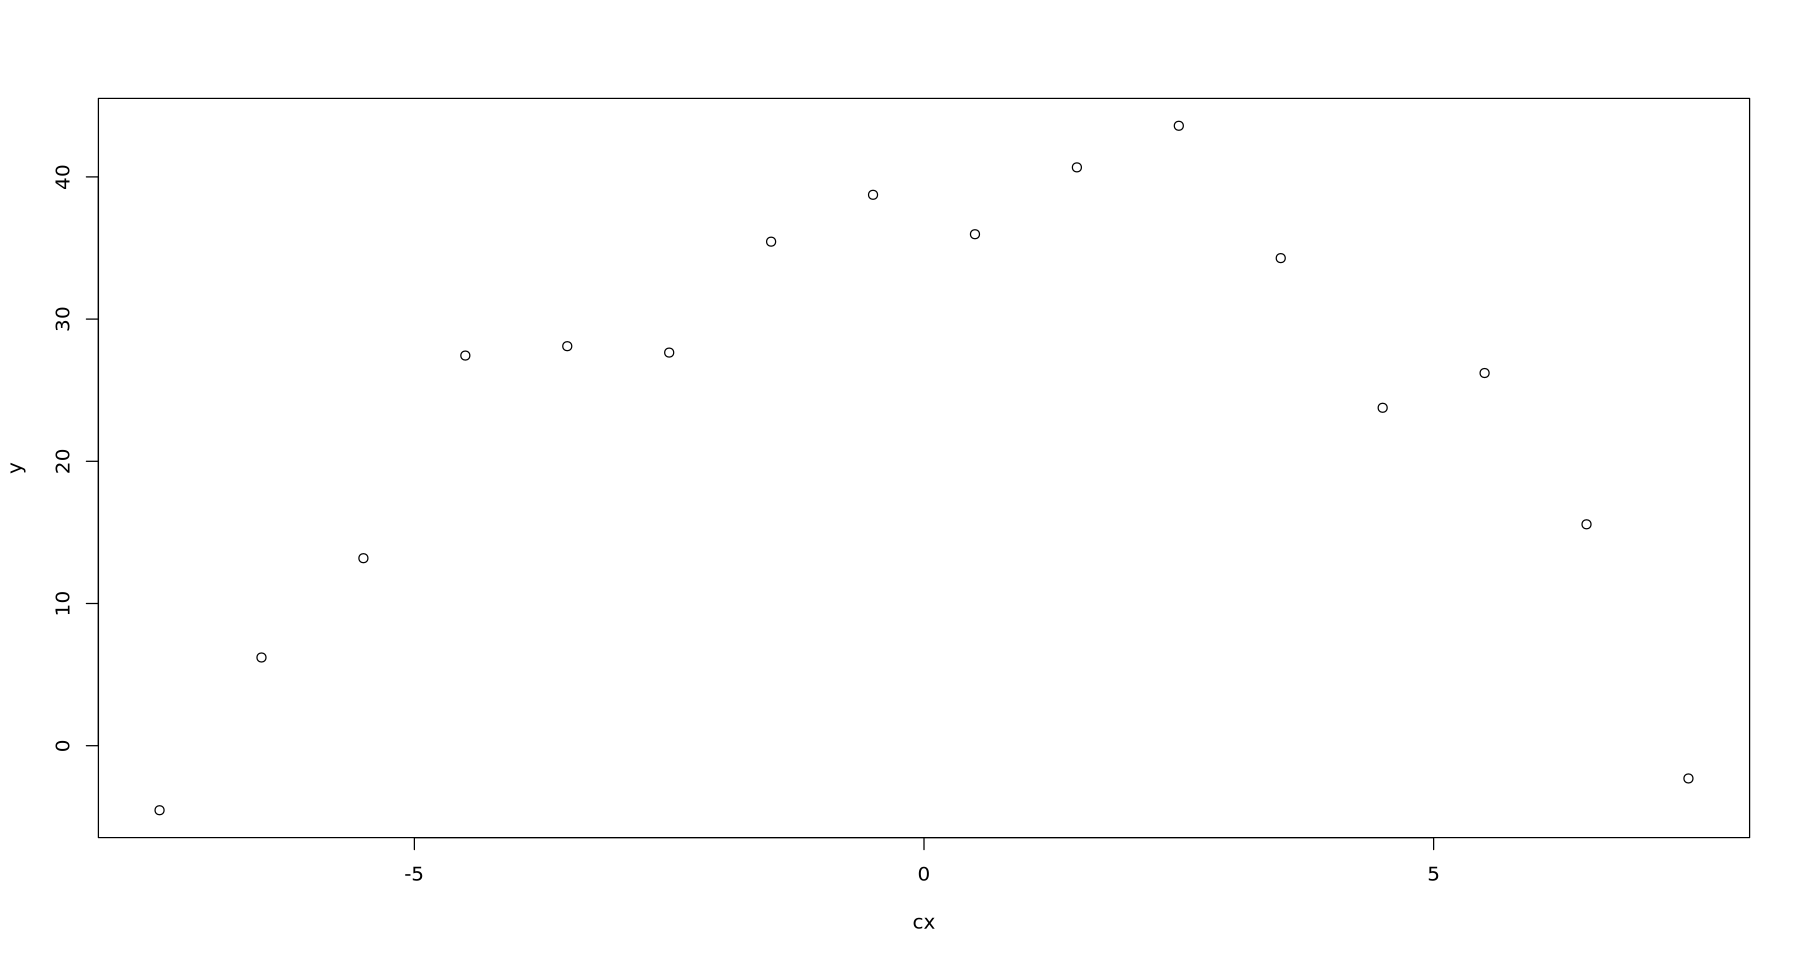

In [4]:
cx <- x - mean(x)
plot(cx, y)

In [5]:
hard_fit <- lm(y~x)
summary(hard_fit)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.103  -9.115   5.234  11.464  17.745 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  19.9450     7.2136   2.765   0.0152 *
x             0.5904     0.8194   0.720   0.4831  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.11 on 14 degrees of freedom
Multiple R-squared:  0.03575,	Adjusted R-squared:  -0.03312 
F-statistic: 0.5191 on 1 and 14 DF,  p-value: 0.4831


In [6]:
hard_fit_c <- lm(y~cx)
summary(hard_fit_c)


Call:
lm(formula = y ~ cx)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.103  -9.115   5.234  11.464  17.745 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  24.3726     3.7773   6.452 1.52e-05 ***
cx            0.5904     0.8194   0.720    0.483    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.11 on 14 degrees of freedom
Multiple R-squared:  0.03575,	Adjusted R-squared:  -0.03312 
F-statistic: 0.5191 on 1 and 14 DF,  p-value: 0.4831


> $\beta_0$의 값만 바뀌고, $\beta_1$의 값은 바뀌지 않았다.

정확히는 $ - \beta_1 \times \bar{x}$만큼 $\beta_0$의 값이 변하였다.

In [7]:
21.579 + 0.3674 * mean(x)

[1] 24.3345

`-` 다항회귀 모형

In [8]:
hard_fit_2 <- lm(y~x+I(x^2))
summary(hard_fit_2)


Call:
lm(formula = y ~ x + I(x^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0819 -2.2856  0.1441  1.8997  6.9153 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.32373    2.72864  -1.951   0.0729 .  
x           11.41979    0.84406  13.530 4.89e-09 ***
I(x^2)      -0.72196    0.05428 -13.301 6.03e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.102 on 13 degrees of freedom
Multiple R-squared:  0.934,	Adjusted R-squared:  0.9238 
F-statistic: 91.97 on 2 and 13 DF,  p-value: 2.125e-08


> 훨씬 모형이 개선되었다.

In [9]:
hard_fit_c_2 <- lm(y~cx+I(cx^2))
summary(hard_fit_c_2)


Call:
lm(formula = y ~ cx + I(cx^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0819 -2.2856  0.1441  1.8997  6.9153 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.71432    1.54348  25.730 1.55e-12 ***
cx           0.59036    0.22248   2.653   0.0199 *  
I(cx^2)     -0.72196    0.05428 -13.301 6.03e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.102 on 13 degrees of freedom
Multiple R-squared:  0.934,	Adjusted R-squared:  0.9238 
F-statistic: 91.97 on 2 and 13 DF,  p-value: 2.125e-08


> $\beta_2$만 동일하고 나머지는 바뀌었다. 표준오차도 작아진다. (수식 대입해보면 당연함.)

In [10]:
print(paste("corr(x, x^2) = ", round(cor(x, x^2), 3)))
print(paste("corr(cx, cx^2) = ", round(cor(cx, cx^2), 3)))

[1] "corr(x, x^2) =  0.965"
[1] "corr(cx, cx^2) =  0"


> 굳이 센터링한 것을 쓸 필요는 없을 것 같다... 게다가 센터링 한 경우 $\beta_1$은 통계적으로 유의하지 않게 되었음

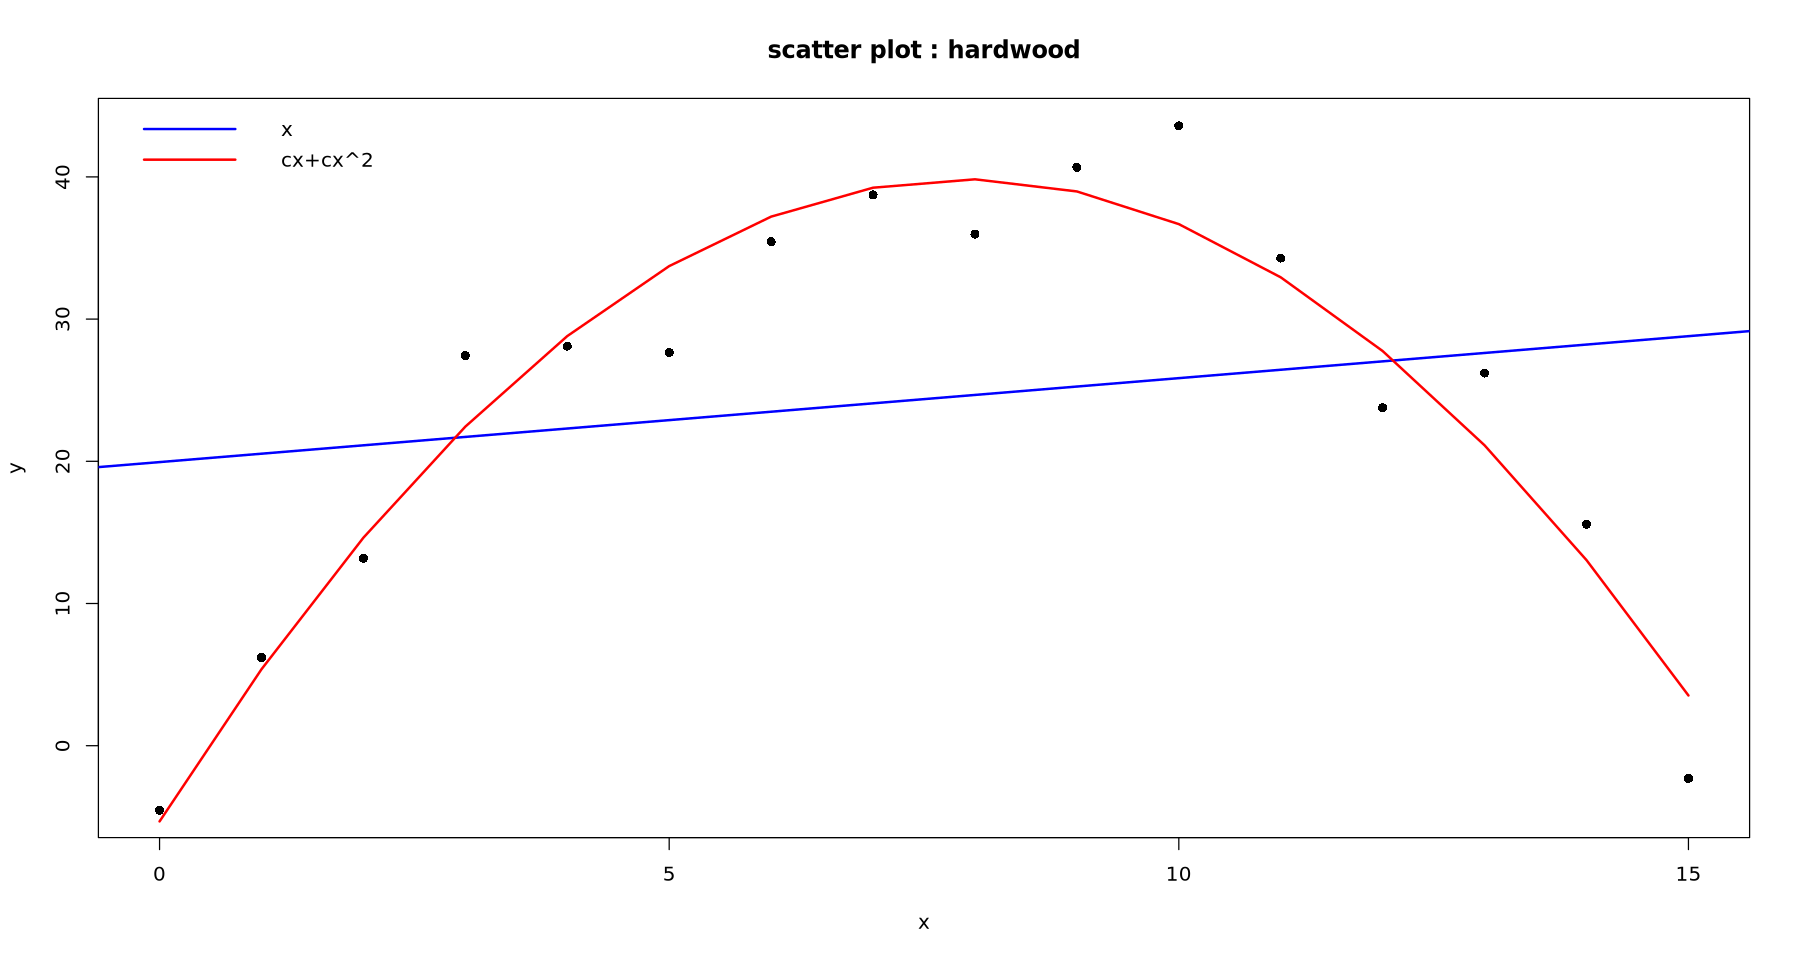

In [11]:
plot(y~x, pch = 16, main = "scatter plot : hardwood")
abline(hard_fit, col = "blue", lwd = 2)
lines(x, fitted(hard_fit_c_2), col = "red", lwd = 2)
legend("topleft", c("x", "cx+cx^2"), col=c('blue', 'red'), lwd=2, lty=1, bty = "n")

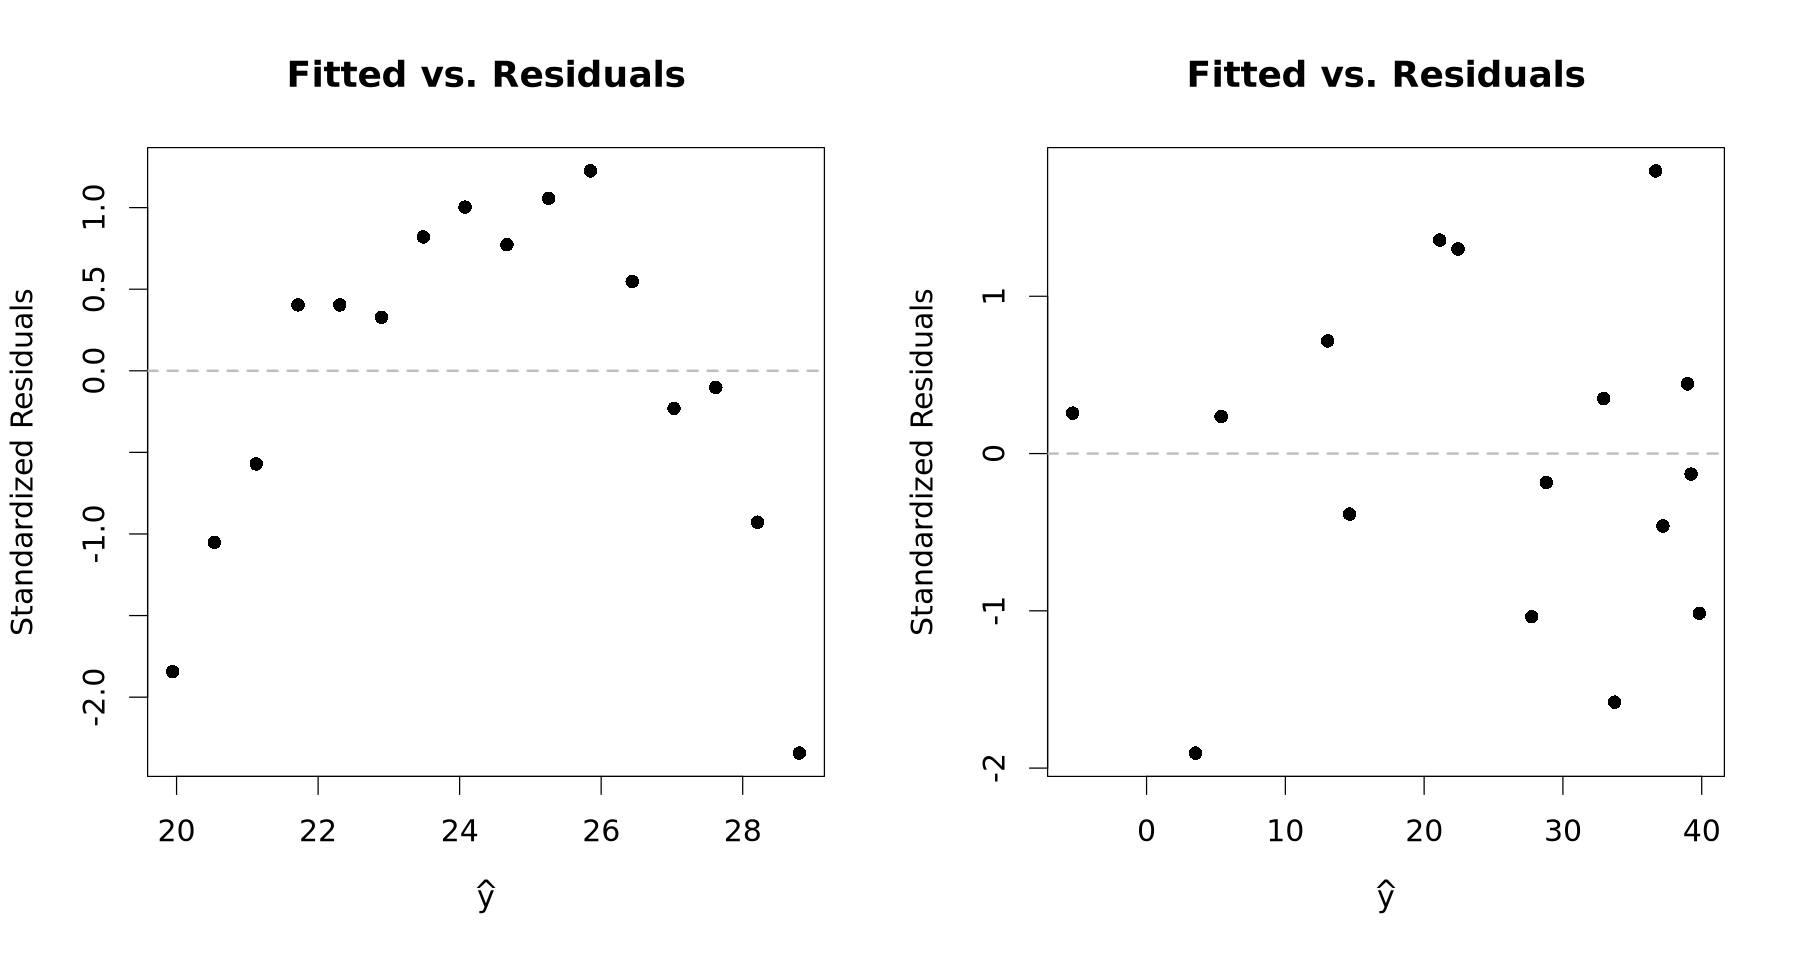

In [12]:
par(mfrow=c(1,2), cex = 1.5)
plot(fitted(hard_fit), rstandard(hard_fit), pch = 16,
 xlab = expression(hat(y)),
 ylab = "Standardized Residuals",
 main = "Fitted vs. Residuals")
abline(h = 0, col = "grey", lwd = 2, lty=2)
plot(fitted(hard_fit_c_2), rstandard(hard_fit_c_2), pch = 16,
 xlab = expression(hat(y)),
 ylab = "Standardized Residuals",
 main = "Fitted vs. Residuals")
abline(h = 0, col = "grey", lwd = 2, lty=2)

> 다항회귀에서는 잔차그림에서의 곡선 개형이 보이지 않았다. 등분산성이 조금 신경쓰이긴 하네...

`-` 3차항

In [13]:
summary(lm(y~cx+I(cx^2)+I(cx^3)))


Call:
lm(formula = y ~ cx + I(cx^2) + I(cx^3))

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5418 -2.1924 -0.2663  1.5435  6.5512 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.71432    1.47594  26.908 4.27e-12 ***
cx           1.32833    0.53936   2.463   0.0299 *  
I(cx^2)     -0.72196    0.05191 -13.909 9.19e-09 ***
I(cx^3)     -0.01939    0.01303  -1.489   0.1623    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.923 on 12 degrees of freedom
Multiple R-squared:  0.9443,	Adjusted R-squared:  0.9304 
F-statistic: 67.79 on 3 and 12 DF,  p-value: 8.559e-08


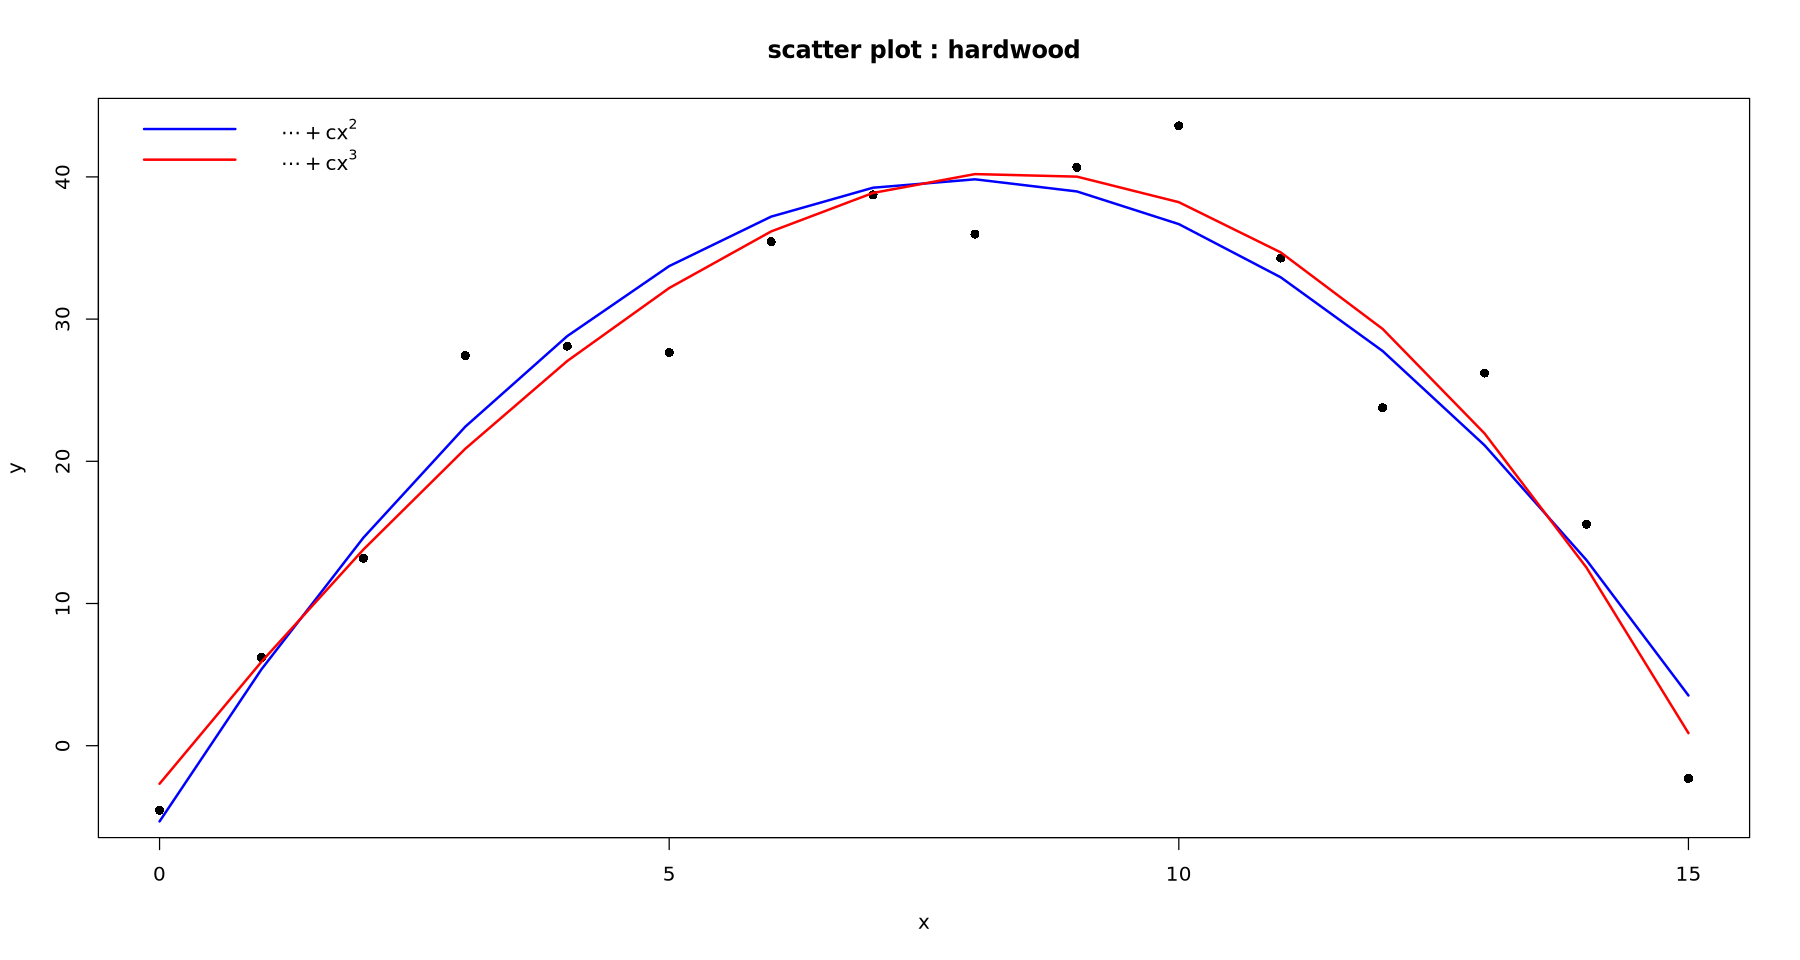

In [14]:
plot(y~x, pch = 16, main = "scatter plot : hardwood")
lines(x, fitted(hard_fit_c_2), col = "blue", lwd = 2)
lines(x, fitted(lm(y~cx+I(cx^2)+I(cx^3))), col = "red", lwd = 2)
legend("topleft", c(expression(cdots+cx^2), expression(cdots+cx^3)), col=c('blue', 'red'), lwd=2, lty=1, bty = "n")

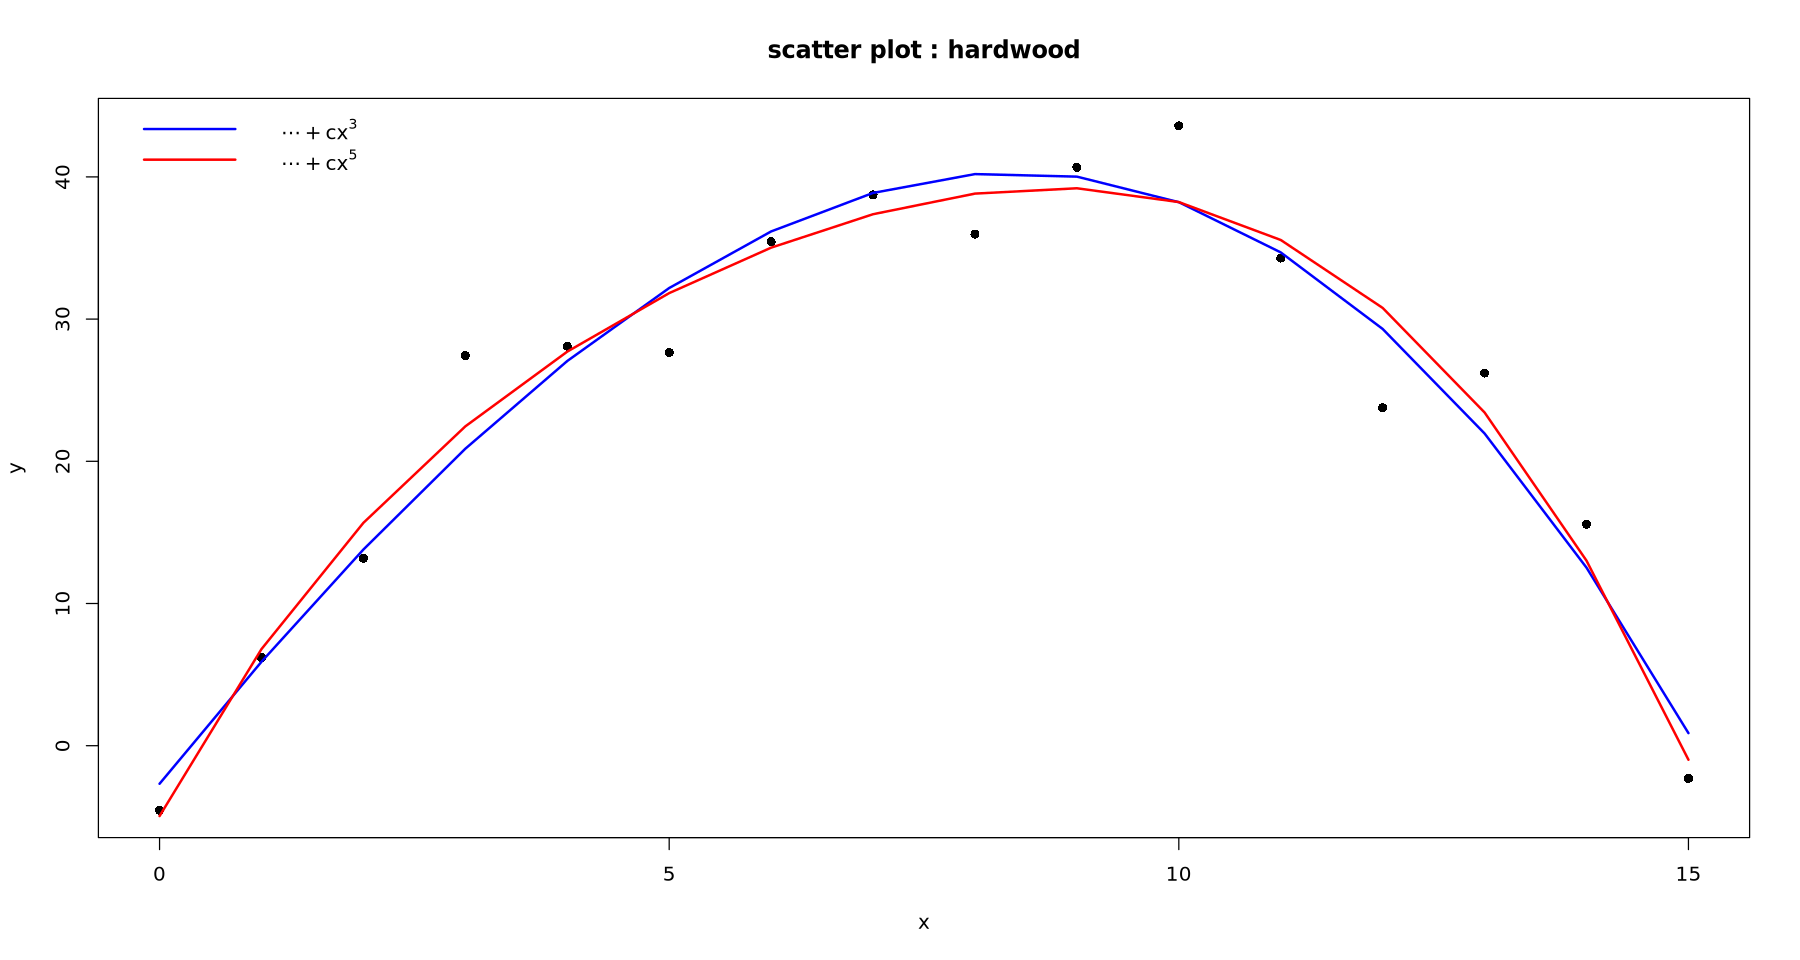

In [15]:
plot(y~x, pch = 16, main = "scatter plot : hardwood")
lines(x, fitted(lm(y~cx+I(cx^2)+I(cx^3))), col = "blue", lwd = 2)
lines(x, fitted(lm(y~cx+I(cx^2)+I(cx^3)+I(cx^4)+I(cx^5))), col = "red", lwd = 2)
legend("topleft", c(expression(cdots+cx^3), expression(cdots+cx^5)), col=c('blue', 'red'), lwd=2, lty=1, bty = "n")

> 오차항까지 적합하려 하고 있다. 따라서 너무 많이 하면 안좋음

In [16]:
summary(lm(y~cx+I(cx^2)+I(cx^3)+I(cx^4)+I(cx^5)))


Call:
lm(formula = y ~ cx + I(cx^2) + I(cx^3) + I(cx^4) + I(cx^5))

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0211 -1.6082  0.3967  1.7420  5.3650 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 38.2205995  1.8761626  20.372 1.79e-09 ***
cx           1.4564506  0.9763623   1.492   0.1666    
I(cx^2)     -0.4832262  0.1892862  -2.553   0.0287 *  
I(cx^3)     -0.0290560  0.0624848  -0.465   0.6519    
I(cx^4)     -0.0044269  0.0033725  -1.313   0.2186    
I(cx^5)      0.0001397  0.0008831   0.158   0.8775    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.965 on 10 degrees of freedom
Multiple R-squared:  0.9526,	Adjusted R-squared:  0.9289 
F-statistic: 40.17 on 5 and 10 DF,  p-value: 2.649e-06
